In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# RL in Custom Environmnet 

In [25]:
from custom_env import BlobEnvironment, SIZE, FOOD_REWARD
import numpy as np
import matplotlib.pyplot as plt
import pickle # to save/load Q-Tables
from pathlib import Path

In [26]:
# Rendering
SHOW_EVERY = 50             # How often to render the environment visually  

EPISODES = 1000
LEARNING_RATE = 0.00025
DISCOUNT = 0.95            # How much we value future rewards

# Randomness
START_EPISLON = 0.5        # Randomness to encourage exploration
END_EPISLON = 0.1          # Stop exploration
DECAY_EPSILON = 0.9999     # Decay epislon every episode to decrease exploration as we progress

In [34]:
epsilon = START_EPISLON
q_table_file = Path('custom_env_q_table.pkl')       # If we've a saved q-table 

Our Observation is defined as the player's distance to the food and enemy

In [28]:
if q_table_file.is_file():
    with open(q_table_file.resolve(), 'rb') as f:
        q_table = pickle.load(f)
else:
    q_table = {}
    for i in range(-SIZE+1, SIZE):
        for j in range(-SIZE+1, SIZE):
            for k in range(-SIZE+1, SIZE):
                for m in range(-SIZE+1, SIZE):
                    q_table[((i,j), (k,m))] = [np.random.uniform(-5,0) for _ in range(4)]

In [29]:
episode_rewards = []
env = BlobEnvironment()
for episode in range(EPISODES):
    # Reset the environment
    obs, reward, won, alive, info = env.reset()
    env.episode = episode
    done = False
    while not done:
        # Higher epsilon means less exploration/random moves
        if np.random.random() > epsilon:
            action = np.argmax(q_table[obs])
        else:
            action = np.random.randint(0,4)
        # Take action and get observations, rewards, win and alive status
        new_obs, reward, won, alive, info = env.step(action)

        # Expected maximum Q value for the new state in the future
        max_future_q = np.max(q_table[new_obs])

        # Current Q value, for action we took
        current_q = q_table[obs][action]

        done = won or not alive 
        # If we got the food reward, no calcuation required to update new_q, we won
        if won:
            new_q = FOOD_REWARD
        else:
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
        
        q_table[obs][action] = new_q
        obs = new_obs
        if episode % SHOW_EVERY == 0:
            env.render(f'Blobs: {episode}')
    episode_rewards.append(reward)
    epsilon *= DECAY_EPSILON
    if env.has_won():
        print(f'I won on episode {episode}')
env.shutdown()

I won on episode 1
I won on episode 6
I won on episode 9
I won on episode 11
I won on episode 14
I won on episode 17
I won on episode 20
I won on episode 22
I won on episode 23
I won on episode 29
I won on episode 30
I won on episode 31
I won on episode 35
I won on episode 36
I won on episode 40
I won on episode 41
I won on episode 44
I won on episode 49
I won on episode 51
I won on episode 57
I won on episode 58
I won on episode 61
I won on episode 62
I won on episode 63
I won on episode 65
I won on episode 66
I won on episode 67
I won on episode 73
I won on episode 76
I won on episode 77
I won on episode 78
I won on episode 80
I won on episode 82
I won on episode 84
I won on episode 86
I won on episode 90
I won on episode 92
I won on episode 94
I won on episode 98
I won on episode 100
I won on episode 109
I won on episode 110
I won on episode 112
I won on episode 115
I won on episode 116
I won on episode 117
I won on episode 120
I won on episode 123
I won on episode 126
I won on epis

2024-10-05 22:25:38.289 python[67729:2012868] _TIPropertyValueIsValid called with 16 on nil context!
2024-10-05 22:25:38.289 python[67729:2012868] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2024-10-05 22:25:38.289 python[67729:2012868] Text input context does not respond to _valueForTIProperty:


I won on episode 553
I won on episode 556
I won on episode 558
I won on episode 564
I won on episode 565
I won on episode 566
I won on episode 567
I won on episode 570
I won on episode 573
I won on episode 574
I won on episode 575
I won on episode 577
I won on episode 579
I won on episode 580
I won on episode 582
I won on episode 586
I won on episode 587
I won on episode 589
I won on episode 590
I won on episode 594
I won on episode 595
I won on episode 596
I won on episode 597


2024-10-05 22:25:43.106 python[67729:2012868] _TIPropertyValueIsValid called with 16 on nil context!
2024-10-05 22:25:43.106 python[67729:2012868] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2024-10-05 22:25:43.106 python[67729:2012868] Text input context does not respond to _valueForTIProperty:


I won on episode 600
I won on episode 603
I won on episode 605
I won on episode 606
I won on episode 607
I won on episode 608
I won on episode 609
I won on episode 610
I won on episode 611
I won on episode 612
I won on episode 613
I won on episode 615
I won on episode 616
I won on episode 618
I won on episode 620
I won on episode 628
I won on episode 629
I won on episode 630
I won on episode 631
I won on episode 635
I won on episode 636
I won on episode 637
I won on episode 640
I won on episode 641
I won on episode 646
I won on episode 647
I won on episode 648
I won on episode 649
I won on episode 650
I won on episode 651
I won on episode 652
I won on episode 655
I won on episode 657
I won on episode 658
I won on episode 666
I won on episode 668
I won on episode 669
I won on episode 678
I won on episode 680
I won on episode 684
I won on episode 686
I won on episode 690
I won on episode 694
I won on episode 698
I won on episode 700
I won on episode 704
I won on episode 707
I won on epis

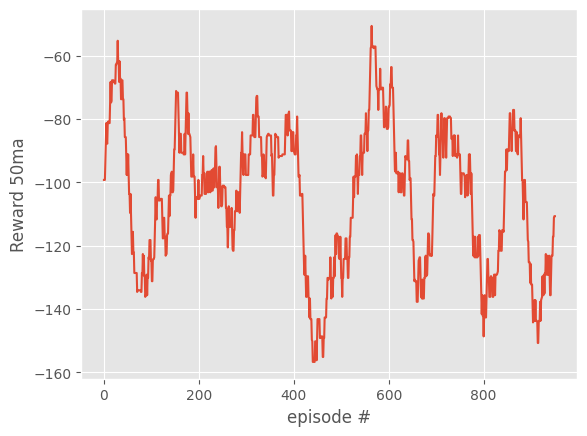

In [32]:
moving_avg = np.convolve(episode_rewards, np.ones((SHOW_EVERY,))/SHOW_EVERY, mode='valid')

plt.plot([i for i in range(len(moving_avg))], moving_avg)
plt.ylabel(f"Reward {SHOW_EVERY}ma")
plt.xlabel("episode #")
plt.show()

In [38]:
if q_table_file:
    with open(q_table_file.resolve(),  "wb") as fp:   #Pickling
        pickle.dump(q_table, fp)